In [148]:
import pandas as pd
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [160]:
bro = pd.read_csv('konvert/data_jam_13.csv')
print(bro)

              created_at  Navigation Status       MMSI   Longitude   Latitude  \
0    2024-08-09 13:30:14                  3  525023329  106.091325  -5.905955   
1    2024-08-09 13:30:14                  0  525200031  105.993102  -5.950530   
2    2024-08-09 13:30:14                 15  525500603  105.976063  -5.925017   
3    2024-08-09 13:30:14                  0  636015031  105.716583  54.187103   
4    2024-08-09 13:30:14                  0  525100582   69.202130  68.680135   
..                   ...                ...        ...         ...        ...   
112  2024-08-09 13:55:05                  0  525600466   80.811197  72.854255   
113  2024-08-09 13:57:20                  0  525007392  105.894332  -5.910590   
114  2024-08-09 13:58:19                  0  294067712   76.486290  94.463737   
115  2024-08-09 13:59:04                  0  525300723  -91.929602 -94.617235   
116  2024-08-09 13:59:51                  0  525100633  105.994115  -5.929562   

                     Ship_T

In [171]:
bro = pd.DataFrame(bro)

In [172]:
bro['Ship_Type'] = bro['Ship_Type'].str.lower()

In [173]:
print(bro['Ship_Type'].unique())

['tankers' 'pilot' 'unknown ship type' 'passenger' 'cargo ' 'sailing'
 'tugs' 'high-speed craft' 'fishing']


In [174]:
bro['z_lat'] = zscore(bro['Latitude'])
bro['z_lon'] = zscore(bro['Longitude'])

In [175]:
bro_cleaned = bro[(bro['z_lat'].abs() <= 2) & (bro['z_lon'].abs() <= 2)]

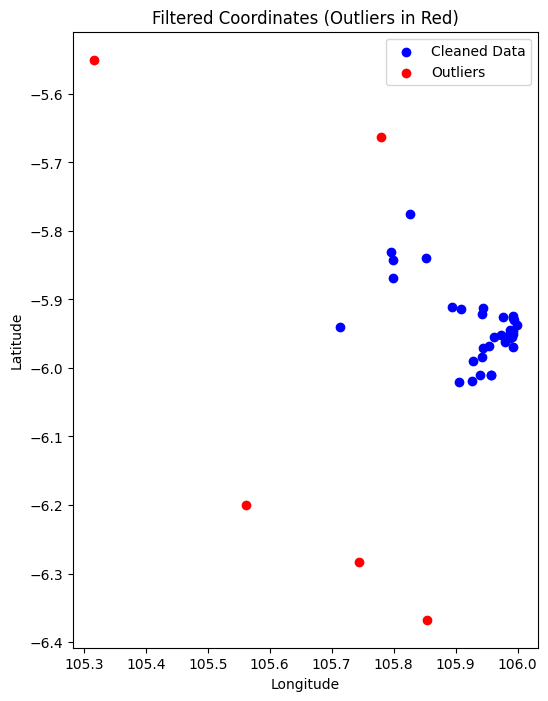

In [176]:
plt.figure(figsize=(6, 8))
plt.scatter(bro_cleaned['Longitude'], bro_cleaned['Latitude'], c='blue', label='Cleaned Data')
plt.scatter(bro[~bro.index.isin(bro_cleaned.index)]['Longitude'], 
            bro[~bro.index.isin(bro_cleaned.index)]['Latitude'], c='red', label='Outliers')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Filtered Coordinates (Outliers in Red)")
plt.legend()
plt.show()


In [177]:
print("\nData setelah menghapus outlier:")
print(bro_cleaned)


Data setelah menghapus outlier:
              created_at  Navigation Status       MMSI   Longitude  Latitude  \
1    2024-08-09 13:30:14                  0  525200031  105.993102 -5.950530   
2    2024-08-09 13:30:14                 15  525500603  105.976063 -5.925017   
6    2024-08-09 13:30:14                  0  370385000  105.942110 -5.921052   
7    2024-08-09 13:30:14                 15  525016693  105.938650 -6.009612   
9    2024-08-09 13:30:18                 15  525002068  105.987595 -5.956517   
10   2024-08-09 13:30:18                  0  525100805  105.987308 -5.949153   
11   2024-08-09 13:30:24                  0  525001136  105.998820 -5.936692   
14   2024-08-09 13:30:32                  0  372895000  105.713542 -5.940457   
19   2024-08-09 13:30:42                  8  525003465  105.992220 -5.923698   
20   2024-08-09 13:30:47                  1  441838000  105.941982 -5.984178   
21   2024-08-09 13:30:47                  0  525015491  105.990930 -5.954820   
24   20

In [178]:
bro = pd.DataFrame(bro_cleaned)

In [179]:
lat_min, lat_max = -6.5, -5.5
lon_min, lon_max = 104.5, 106.0

In [180]:
filtered_bro = bro[
    (bro['Latitude'] >= lat_min) & (bro['Latitude'] <= lat_max) &
    (bro['Longitude'] >= lon_min) & (bro['Longitude'] <= lon_max)
]

bro = pd.DataFrame(filtered_bro)


Found 1 tankers ships.
Plotting tankers ships at coordinates: [(99002.39760176853, 154514.9064373367)]

Found 9 passenger ships.
Plotting passenger ships at coordinates: [(98453.43748912736, 153918.83265618607), (99572.45878410665, 155892.72108562326), (98914.50416968735, 157186.37133064715), (96975.53185900925, 154372.8582715788), (98491.98432512696, 155133.20987366), (98499.128781792, 154320.41983559274), (95885.08839071984, 154105.18939237017), (82362.62571299024, 171970.7391143263), (89156.00710687813, 158491.44002364867)]

Found 1 fishing ships.
Plotting fishing ships at coordinates: [(79628.45875973006, 162634.09998453245)]

Found 1 tugs ships.
Plotting tugs ships at coordinates: [(92299.7341925966, 147763.5531725696)]

Found 0 other types of vessels ships.
No other types of vessels ships found in the data.

Found 0 search and rescue vessels ships.
No search and rescue vessels ships found in the data.


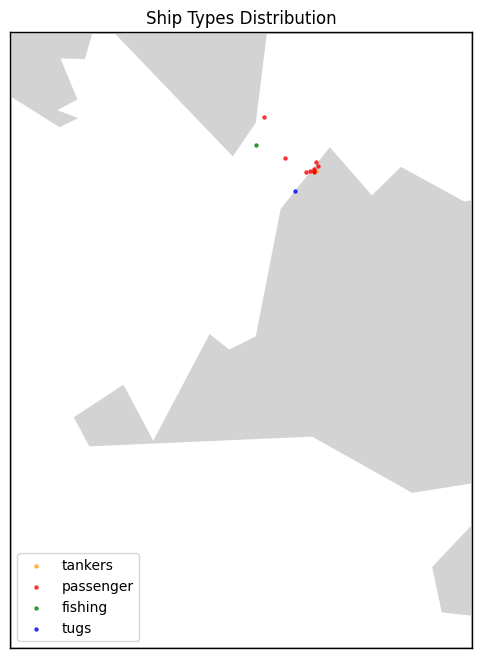

In [181]:
ig,ax=plt.subplots(figsize=(8,8))
m = Basemap(llcrnrlon=minlon,llcrnrlat=minlat,urcrnrlon=maxlon,
            urcrnrlat=maxlat,rsphere=(6378137.00,6356752.3142),
            resolution='l',projection='merc',lat_0=lat0,lon_0=lon0,
            lat_ts = lat1)
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='lightgrey',lake_color='white')
colors = {
  'tankers': 'orange',
    'passenger': 'red',      
    'fishing': 'green',
    'tugs': 'blue',
    'other types of vessels': 'yellow',
    'search and rescue vessels': 'purple',
}
for shiptype, color in colors.items():
    subset = bro[bro['Ship_Type'] == shiptype]
    print(f"\nFound {len(subset)} {shiptype} ships.")
    if not subset.empty:
        x, y = m(subset['Longitude'].values, subset['Latitude'].values)
        print(f"Plotting {shiptype} ships at coordinates: {list(zip(x, y))}")
        m.scatter(x, y, s=5, c=color, marker='o', alpha=0.7, label=shiptype)
    else:
        print(f"No {shiptype} ships found in the data.")    
plt.legend(loc='lower left')
plt.title('Ship Types Distribution')
plt.show()